In [1]:
library(ggplot2)
library(latex2exp)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Exercise 1

## Point 1

In [2]:
draws <- c(4, 1, 3, 1, 3)
mu_range <- seq(1, 7, by = 0.01)
posterior <- dgamma(mu_range, shape=sum(draws) + 1, rate=length(draws))


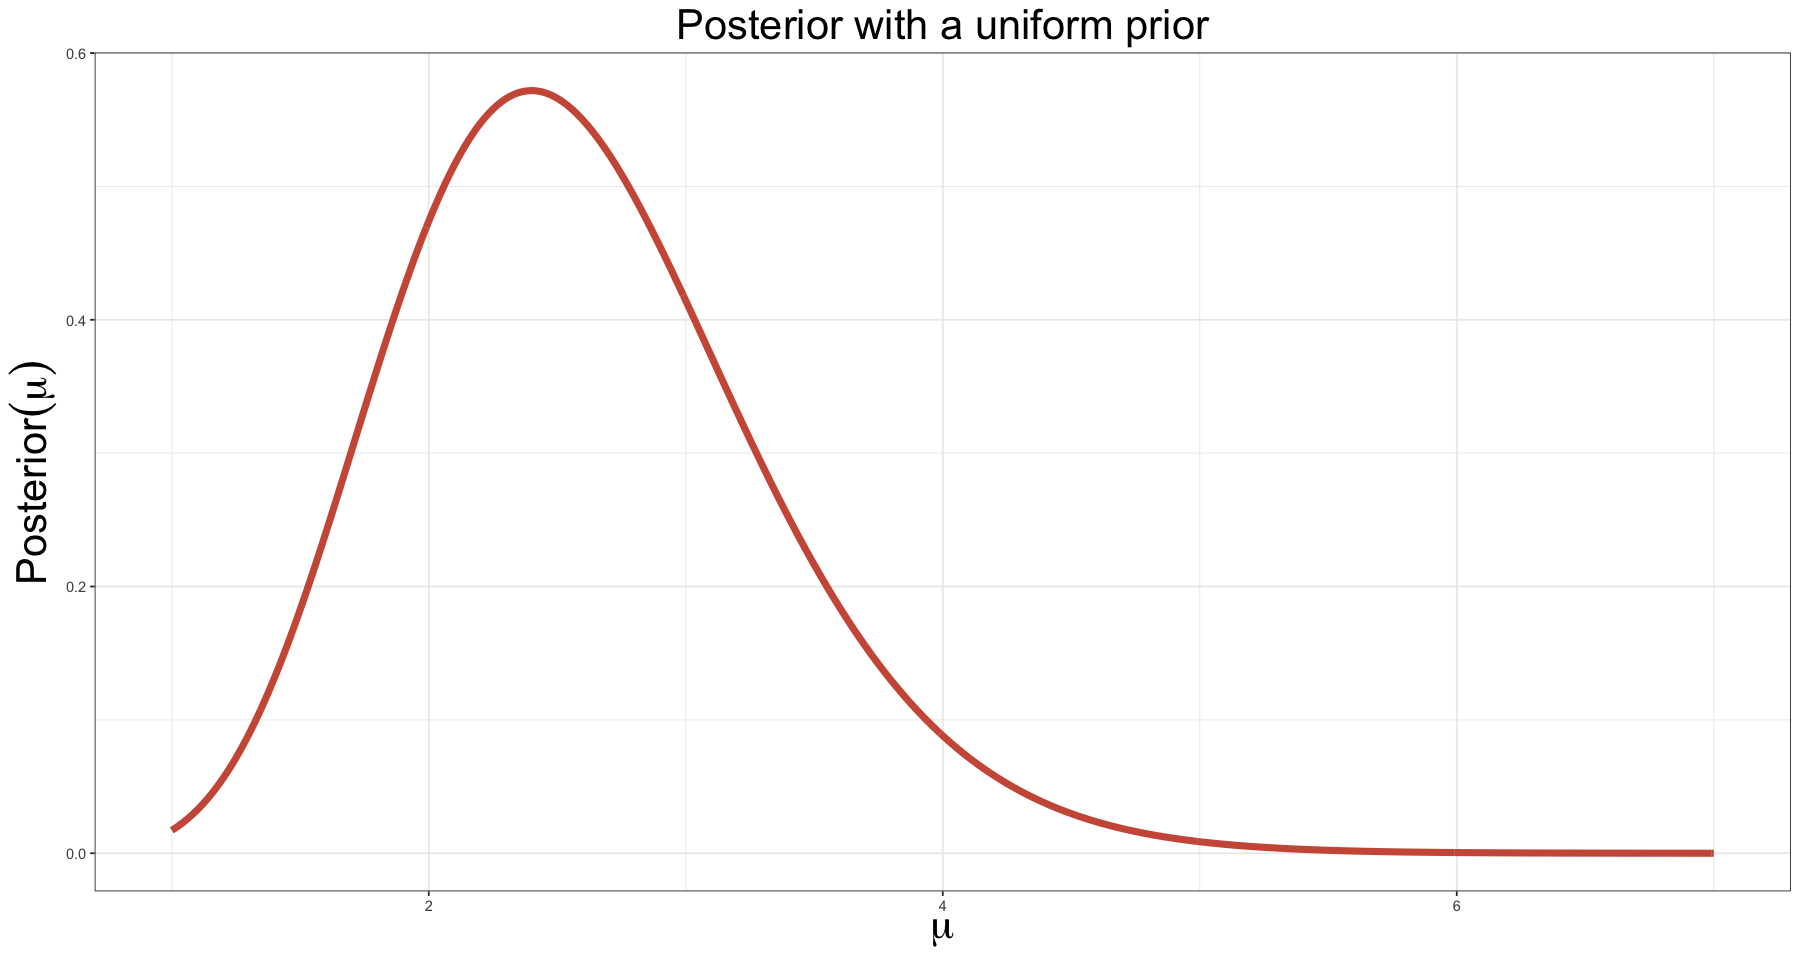

In [3]:
options(repr.plot.width=15, repr.plot.height=8)
plot <- ggplot() +
        
        geom_line(aes(x = mu_range, y = posterior), lwd=2, color='coral3') +
        ggtitle('Posterior with a uniform prior') +
        
        ylab(TeX('$Posterior(\\mu)$')) +
        xlab(TeX('$\\mu$')) +
        theme_bw() +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=25, hjust = 0.5)) 

plot

In [4]:
#Analytic part
cat('The mean of the posterior distribution analitically is: ', (sum(draws) + 1)/length(draws), '\n')
cat('The variance of the posterior distribution is: ', (sum(draws) + 1)/(length(draws)^2), '\n')

The mean of the posterior distribution analitically is:  2.6 
The variance of the posterior distribution is:  0.52 


In [5]:
mean_int <- function(x){
    return(x*dgamma(x, shape=sum(draws) + 1, rate=length(draws)))
}
#Numeric part
mean <- integrate(mean_int, lower = 0, upper = Inf)

In [6]:
cat('The mean obtained with numerical integration is: ', mean$value)

The mean obtained with numerical integration is:  2.6

In [7]:
cumul <- pgamma(mu_range, shape=sum(draws) + 1, rate=length(draws))
median <- mu_range[length(cumul[cumul<0.5])]

cat('The median obtained numerically is: ', median)

The median obtained numerically is:  2.53

In [8]:
var_int <- function(x){
    return((x^2)*dgamma(x, shape=sum(draws) +1 , rate=length(draws)))
}

variance <- integrate(var_int, lower = 0, upper = Inf)

cat('The variance obtained numerically is: ', variance$value - mean$value^2)

The variance obtained numerically is:  0.52

## Point 2

In [9]:
posterior_j <- dgamma(mu_range, shape=sum(draws) + 1/2, rate=length(draws))

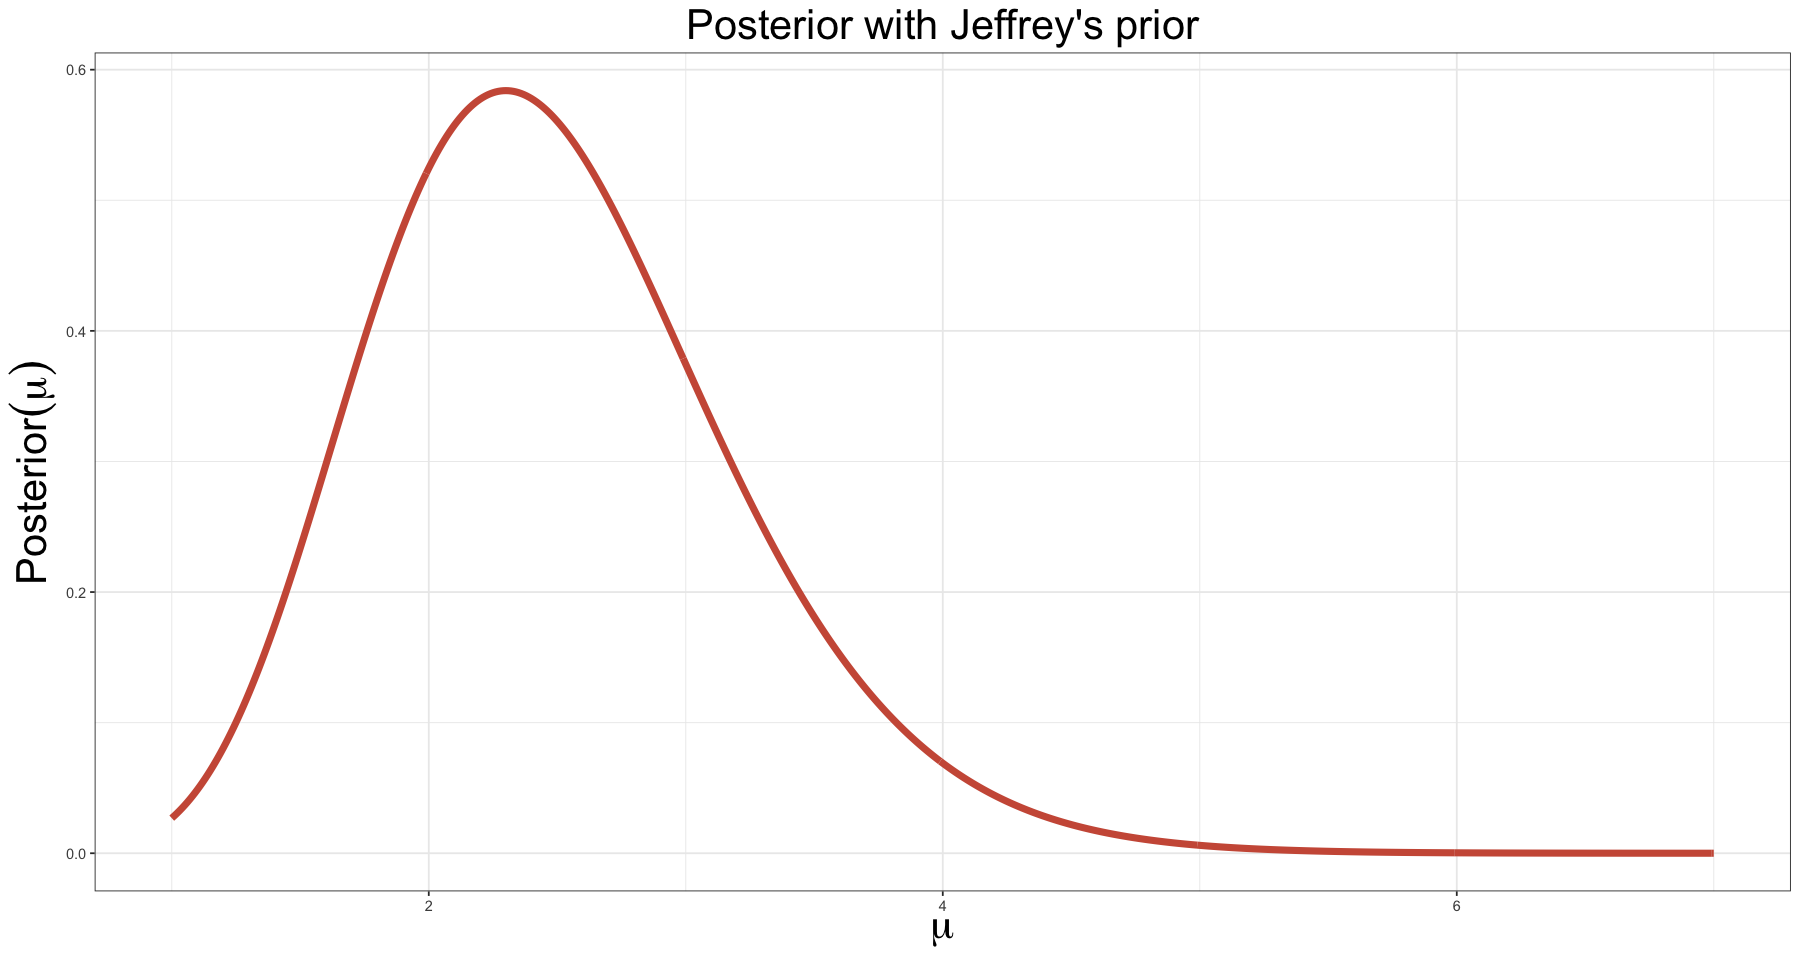

In [10]:
options(repr.plot.width=15, repr.plot.height=8)
plot <- ggplot() +
        
        geom_line(aes(x = mu_range, y = posterior_j), lwd=2, color='coral3') +
        ggtitle('Posterior with Jeffrey\'s prior') +
        
        ylab(TeX('$Posterior(\\mu)$')) +
        xlab(TeX('$\\mu$')) +
        theme_bw() +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=25, hjust = 0.5)) 

plot

In [11]:
#Analytic part
cat('The mean of the posterior distribution analitically is: ', (sum(draws) + 1/2)/length(draws), '\n')
cat('The variance of the posterior distribution is: ', (sum(draws) + 1/2)/(length(draws)^2), '\n')

The mean of the posterior distribution analitically is:  2.5 
The variance of the posterior distribution is:  0.5 


In [12]:
mean_int <- function(x){
    return(x*dgamma(x, shape=sum(draws) + 1/2, rate=length(draws)))
}
#Numeric part
mean <- integrate(mean_int, lower = 0, upper = Inf)

In [13]:
cat('The mean obtained with numerical integration is: ', mean$value)

The mean obtained with numerical integration is:  2.5

In [14]:
cumul <- pgamma(mu_range, shape=sum(draws) + 1, rate=length(draws))
median <- mu_range[length(cumul[cumul<0.5])]

cat('The median obtained numerically is: ', median)

The median obtained numerically is:  2.53

In [15]:
var_int <- function(x){
    return((x^2)*dgamma(x, shape=sum(draws) +1/2 , rate=length(draws)))
}

variance <- integrate(var_int, lower = 0, upper = Inf)

cat('The variance obtained numerically is: ', variance$value - mean$value^2)

The variance obtained numerically is:  0.5

## Point 3

In [16]:
#Uniform prior case

cumul <- pgamma(mu_range, shape=sum(draws) + 1, rate=length(draws))

lower_bound <- mu_range[length(cumul[cumul < 0.025])]
upper_bound <- mu_range[length(cumul[cumul < 0.975])]

x_axis <- seq(lower_bound, upper_bound, by = 0.1)
posterior_cut <- dgamma(seq(lower_bound, upper_bound, by = 0.1), shape=sum(draws) + 1, rate=length(draws))

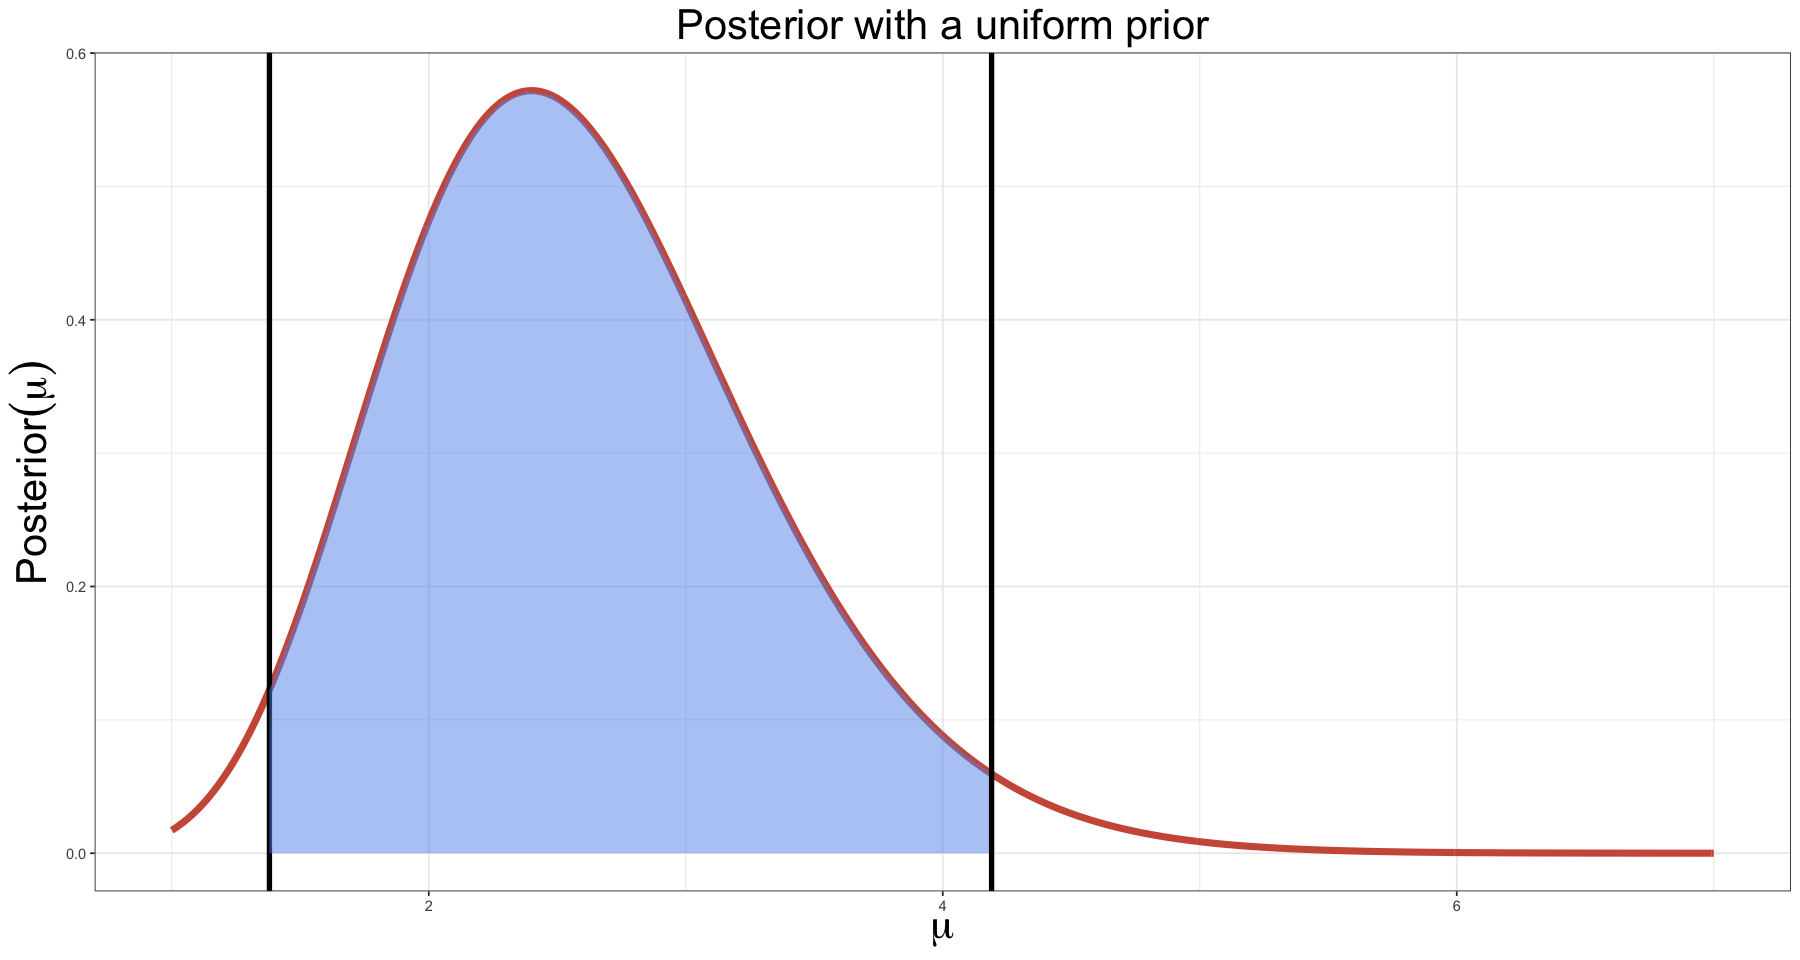

In [17]:

plot <- ggplot() +
        
        geom_line(aes(x = mu_range, y = posterior), lwd=2, color='coral3') +
        ggtitle('Posterior with a uniform prior') +
        
        ylab(TeX('$Posterior(\\mu)$')) +
        xlab(TeX('$\\mu$')) +
        theme_bw() +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=25, hjust = 0.5)) +
        geom_vline(xintercept = lower_bound, lwd=1.5) +
        geom_vline(xintercept = upper_bound, lwd=1.5) +
        geom_ribbon(aes(x = seq(lower_bound, upper_bound, by = 0.1), ymin=0, ymax=posterior_cut), fill='cornflowerblue', alpha=0.5)

plot

In [30]:
#Jeffrey’s prior case

cumul <- pgamma(mu_range, shape=sum(draws) + 1/2, rate=length(draws))

lower_bound <- mu_range[length(cumul[cumul < 0.025])]
upper_bound <- mu_range[length(cumul[cumul < 0.975])]

x_axis <- seq(lower_bound, upper_bound, by = 0.1)
posterior_cut <- dgamma(seq(lower_bound, upper_bound, by = 0.1), shape=sum(draws) + 1/2, rate=length(draws))

In [28]:
upper_bound

[1] 4.06

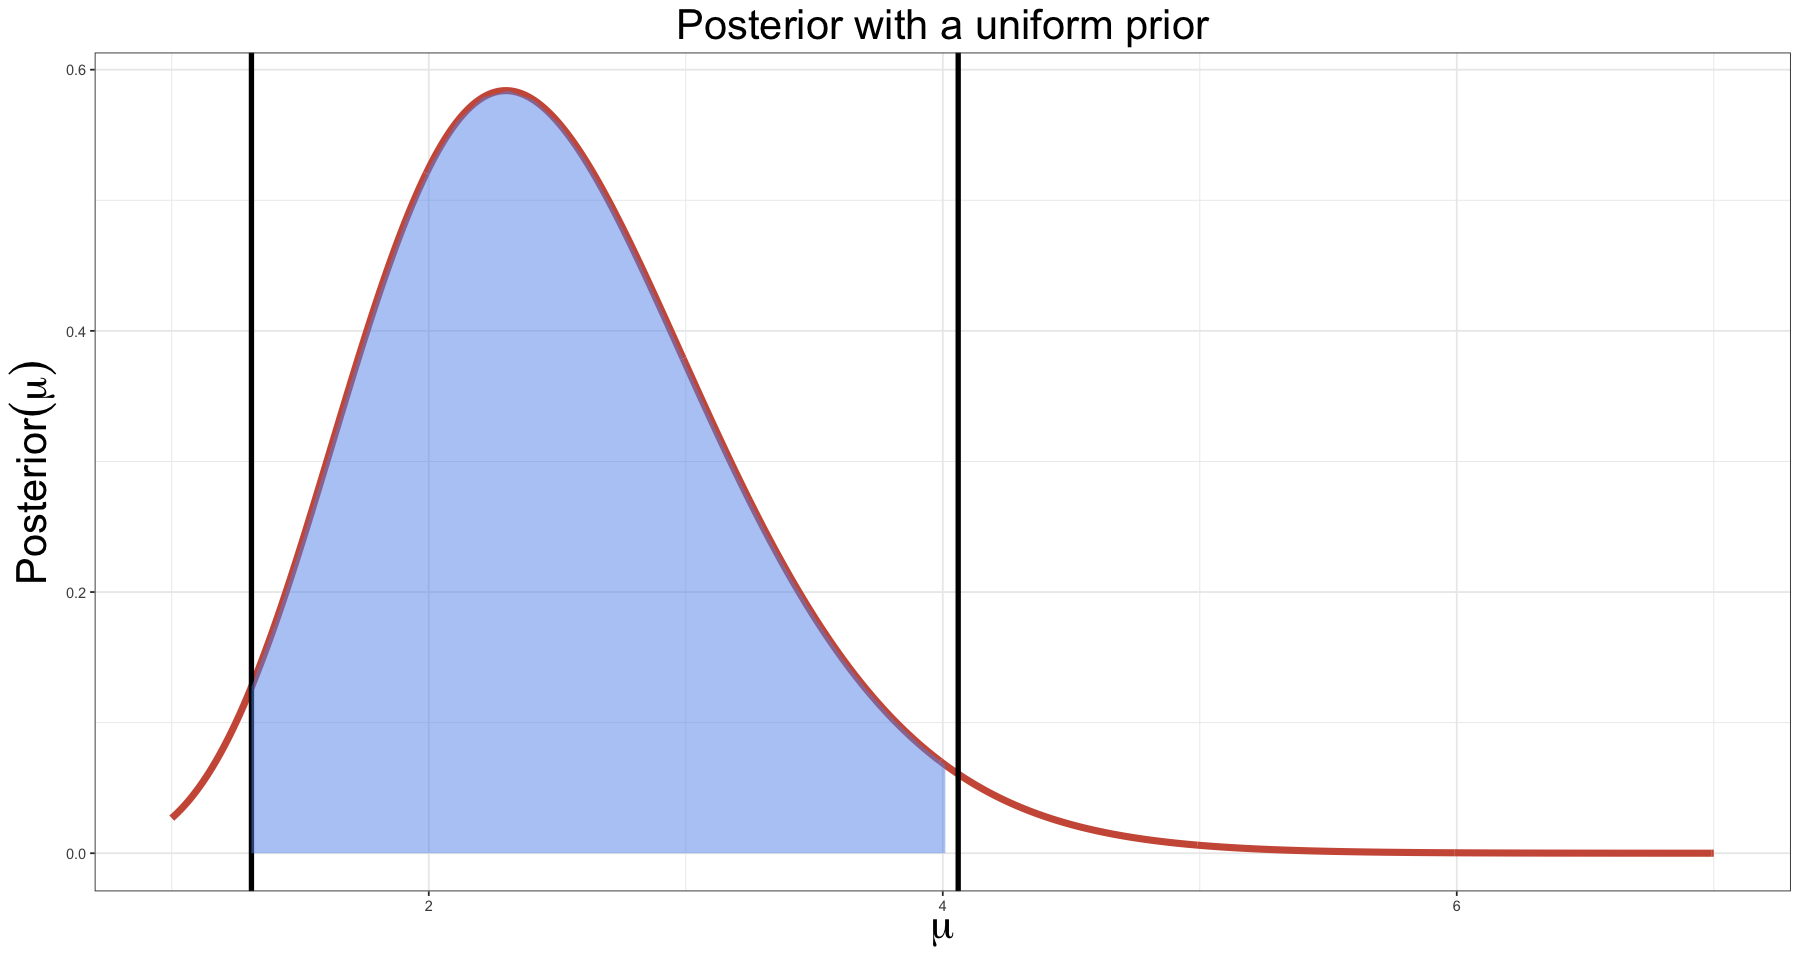

In [31]:

plot <- ggplot() +
        
        geom_line(aes(x = mu_range, y = posterior_j), lwd=2, color='coral3') +
        ggtitle('Posterior with a uniform prior') +
        
        ylab(TeX('$Posterior(\\mu)$')) +
        xlab(TeX('$\\mu$')) +
        theme_bw() +
        theme(plot.title = element_text(size=25, hjust = 0.5)) +
        theme(axis.title = element_text(size=25, hjust = 0.5)) +
        geom_vline(xintercept = lower_bound, lwd=1.5) +
        geom_vline(xintercept = upper_bound, lwd=1.5) +
        geom_ribbon(aes(x = seq(lower_bound, upper_bound, by = 0.1), ymin=0, ymax=posterior_cut), fill='cornflowerblue', alpha=0.5)

plot